# Final Project #  
**Adam Elias**  

## Standard Imports

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [149]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [150]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR
#These imports are specific to performing Linear Regression using the SKLearn and statsmodels libraries

## Imports for Splitting Data and Building Pipeline


In [151]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Imports for Performance Measures

In [152]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [153]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [154]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Model 1: Linear Regression


### Reading the Data

In [155]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/WebDevelopment.csv')
#data from https://data.world/chasewillden/web-development-courses-from-udemy

### Statistical and Visual Exploration

In [156]:
df.describe()

,id,numSubscribers,numReviews,numPublishedLectures,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
count,1.200000e+03,1200.000000,1200.000000,1200.00000,0.0,0.0,0.0,0.0,0.0
mean,7.068543e+05,6650.476667,358.354167,52.81750,NaN,NaN,NaN,NaN,NaN
std,3.289244e+05,14613.648207,1574.814468,62.81375,NaN,NaN,NaN,NaN,NaN
min,8.324000e+03,19.000000,0.000000,5.00000,NaN,NaN,NaN,NaN,NaN
25%,4.757115e+05,1127.500000,25.000000,19.00000,NaN,NaN,NaN,NaN,NaN
50%,7.384560e+05,2416.500000,65.000000,32.00000,NaN,NaN,NaN,NaN,NaN
75%,9.752715e+05,6894.750000,179.250000,63.25000,NaN,NaN,NaN,NaN,NaN
max,1.277924e+06,268923.000000,27445.000000,779.00000,NaN,NaN,NaN,NaN,NaN


In [157]:
df.drop(columns=['id', 'title', 'url', 'price', 'contentInfo', 'publishedTime','Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15'], inplace=True)


In [158]:
df.head()

,isPaid,numSubscribers,numReviews,numPublishedLectures,instructionalLevel
0,True,43285,525,24,All Levels
1,True,47886,285,125,All Levels
2,True,2577,529,64,All Levels
3,True,8777,206,75,Intermediate Level
4,True,23764,490,58,Beginner Level


In [159]:
df.sample(5)

,isPaid,numSubscribers,numReviews,numPublishedLectures,instructionalLevel
112,True,1849,21,83,All Levels
841,False,21689,1080,13,All Levels
338,True,1415,17,23,Beginner Level
490,True,1904,25,17,Beginner Level
256,True,2660,276,16,All Levels


In [160]:
df.count()

isPaid                  1200
numSubscribers          1200
numReviews              1200
numPublishedLectures    1200
instructionalLevel      1200
dtype: int64

In [161]:
isPaid_counts = df['isPaid'].groupby(df['isPaid']).count()
isPaid_counts.columns = ['isPaid', 'Count']

In [162]:
isPaid_counts

isPaid
False     133
True     1067
Name: isPaid, dtype: int64

In [163]:
instructionalLevel_counts = df['instructionalLevel'].groupby(df['instructionalLevel']).count()
instructionalLevel_counts.columns = ['instructionalLevel', 'Count']

In [164]:
instructionalLevel_counts

instructionalLevel
All Levels            659
Beginner Level        391
Expert Level           15
Intermediate Level    135
Name: instructionalLevel, dtype: int64

<Axes: xlabel='instructionalLevel'>

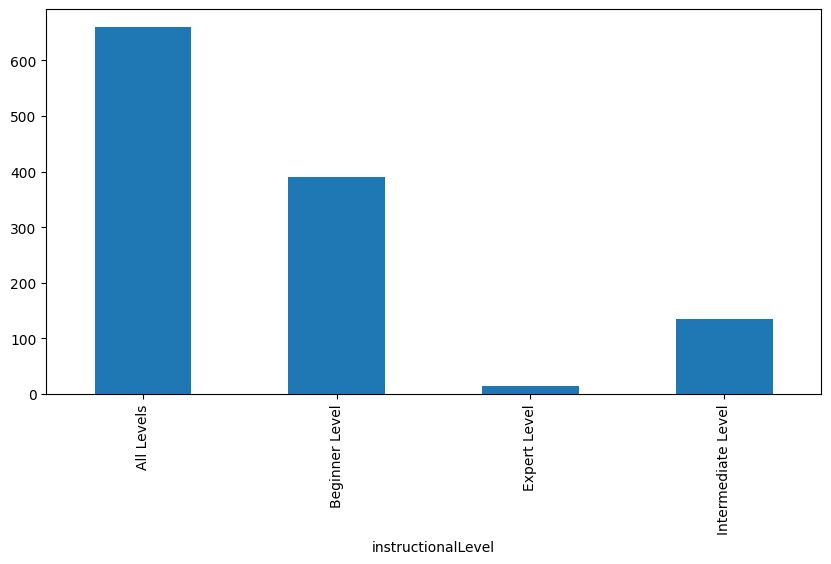

In [165]:
instructionalLevel_counts.plot(kind='bar', x='instructionalLevel', y='count', figsize=(10,5))

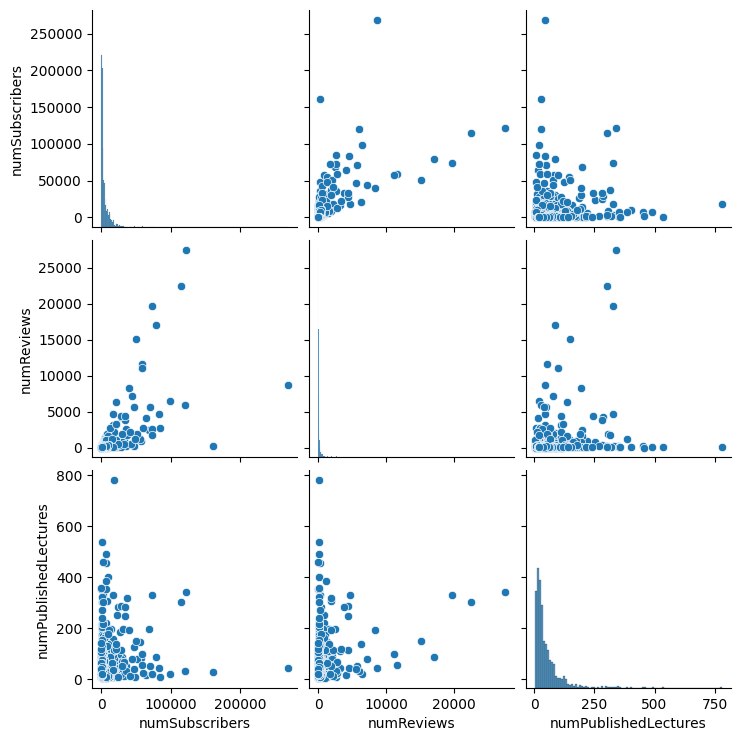

In [166]:
sns.pairplot(df.select_dtypes(include=['float64', 'int64']))

### Splitting Data into Train/Test

In [167]:
df

,isPaid,numSubscribers,numReviews,numPublishedLectures,instructionalLevel
0,True,43285,525,24,All Levels
1,True,47886,285,125,All Levels
2,True,2577,529,64,All Levels
3,True,8777,206,75,Intermediate Level
4,True,23764,490,58,Beginner Level
...,...,...,...,...,...
1195,True,1040,14,21,All Levels
1196,True,306,3,42,Beginner Level
1197,True,513,169,48,All Levels
1198,True,300,31,38,All Levels


In [168]:
df.columns

Index(['isPaid', 'numSubscribers', 'numReviews', 'numPublishedLectures',
       'instructionalLevel'],
      dtype='object')

In [169]:
X = df.drop(columns=['numSubscribers'])

In [170]:
y = df['numSubscribers']

In [171]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=32)

### Building the Pipeline

Determine which attributes are numerical and which are categorical for the pipeline.

In [173]:
num_attribs = ['numReviews', 'numPublishedLectures']
cat_attribs = ['isPaid', 'instructionalLevel']


Set up a preprocessor transformer to apply the train and test.

In [174]:
col_transform = ColumnTransformer(transformers=[
                               ('cat',OneHotEncoder(), cat_attribs)],
                               remainder='passthrough'
                  )

Create the pipeline. Set max iterations, enough so the algorithm settles on a solution.

In [175]:
pipeline = Pipeline([
    ('trans', col_transform),
    ('mlr_model', LinearRegression())])

In [176]:
pipeline
#look at the pipeline I've created

Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['isPaid',
                                                   'instructionalLevel'])])),
                ('mlr_model', LinearRegression())])

### Executing the Model

Model 1: Linear regression

In [177]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['isPaid',
                                                   'instructionalLevel'])])),
                ('mlr_model', LinearRegression())])

### Evaluating Model

Model 1: Evaluating the linear regression

In [178]:
y_train_pred_lr = pipeline.predict(X_train)
y_test_pred_lr = pipeline.predict(X_test)
print("RMSE train: ", mean_squared_error(y_train, y_train_pred_lr)**(0.5))
print("RMSE test: ", mean_squared_error(y_test, y_test_pred_lr)**(0.5))

RMSE train:  11039.4319566285
RMSE test:  8920.486332970278


In [179]:
r2_score(y_test, y_test_pred_lr, )

0.2987987488454029

### Conclusion
The relatively small difference between the train and test RMSE values suggests consistency in the model. However, since the "numSubscribers" value ranges from 19 to 268,923, a RMSE value of 8,920 - 11,039 suggests wide variance and low predictive accuracy.

This R-squared value of approximately .298 is also low and indicates a poor fit between the model prediction and the actual data. This suggests there is a low correlation between numSubscribers and the independent variables when using this model. This suggests only about 29% of the variance in the target variable can be explained by the model.

## Model 2: SVM

### Reading the Data

### Splitting Data into Train/Test

### Building the Pipeline

Now doing the same thing for a Support Vector Machine (SVM).

In [180]:
X_train.head()

,isPaid,numReviews,numPublishedLectures,instructionalLevel
382,True,63,11,Intermediate Level
654,True,12,7,All Levels
908,False,108,18,Beginner Level
114,False,4047,17,Beginner Level
457,True,9,35,All Levels


In [181]:
col_transform_SVM = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)], remainder='passthrough'
    )

In [182]:
pipeline_SVM = Pipeline([
    ('trans', col_transform_SVM),
    ('SVR', SVR(kernel="linear", C=75, max_iter=100000, epsilon=0.0))
])

In [183]:
# Setup GridSearchCV
param_grid = {
    'SVR__C': [50, 75, 100],
    'SVR__epsilon': [0.0, 0.1, 0.2],
    'SVR__kernel': ['linear', 'rbf']
}

Create pipeline with Gridsearch

### Executing the Model with Gridsearch

In [184]:
grid_search = GridSearchCV(pipeline_SVM, param_grid, cv=5, scoring='neg_mean_squared_error')

Fit to pipeline with Gridsearch

In [185]:
grid_search.fit(X_train, np.ravel(y_train))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trans',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['numReviews',
                                                                          'numPublishedLectures']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['isPaid',
                                                                          'instructionalLevel'])])),
                                       ('SVR',
                                        SVR(C=75, epsilon=0.0, kernel='linear',
                                            max_iter=100000))]),
             param_grid={'SVR__C': [50, 75, 100],
                         'SVR__epsilon': [0.0, 0.1, 0.2],
                         'SVR__kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error')

In [186]:
# Best parameters and model
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best parameters: {'SVR__C': 100, 'SVR__epsilon': 0.0, 'SVR__kernel': 'linear'}


In [187]:
# Use the best model to make predictions
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

### Evaluating Model

In [193]:
# Evaluate the best model
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

In [197]:
print("Best model RMSE train: ", rmse_train)
print("Best model RMSE test: ", rmse_test)

Best model RMSE train:  11944.56434201952
Best model RMSE test:  9231.731260905095


In [196]:
r2_score(y_test, y_test_pred, )

0.24901385450736058

### Conclusion
The relatively small difference between the train and test RMSE values suggests consistency in the model. However, since the "numSubscribers" value ranges from 19 to 268,923, a RMSE value of 9,231 - 11,944 suggests wide variance and low predictive accuracy.

This R-squared value of approximately .249 is also low and indicates a poor fit between the model prediction and the actual data. This suggests there is a low correlation between numSubscribers and the independent variables when using this model. This suggests only about 25% of the variance in the target variable can be explained by the model.

I did not include an ROC or Precision-Recall Curve as prompted in the assignment instructions because--according to my understanding--those are useful for classification problems, but not for regression problems.  

Compared to the linear regression model, this model performs worse, as the RMSE scores are higher and the r2 score is lower.  